In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
from scipy import signal

In [2]:
img=cv2.imread('Barbara.bmp',0)

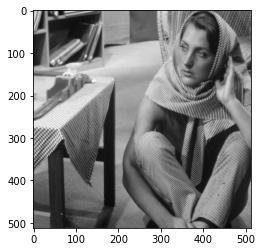

In [3]:
plt.imshow(img,cmap='gray')

In [4]:
mean = 0
variance = 500
noise = np.random.normal(mean,math.sqrt(variance),img.shape)

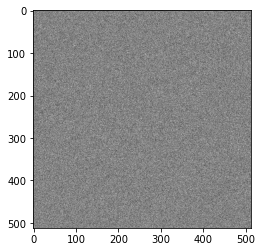

In [5]:
plt.imshow(noise,cmap='gray')

In [6]:
filter_size=3
h= (1/(filter_size)**2) * (np.ones([filter_size,filter_size]))

In [7]:
h

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [8]:
g=signal.fftconvolve(img,h,mode='same')+noise

In [9]:
g

array([[107.6357767 , 123.44548425, 139.24973104, ...,  91.21152016,
         73.56816534,  50.47685788],
       [ 71.9758685 , 203.93947204, 182.09774634, ...,  96.29233159,
        114.41303015,  83.73786332],
       [ 87.55605614, 146.70493261, 222.55202544, ..., 110.05674428,
         74.62515402,  80.39109811],
       ...,
       [ 56.7448715 , 102.70922399, 112.62074846, ...,  67.47584165,
        126.99116681,  75.22637681],
       [ 18.38150867, 108.63816122, 130.11565974, ..., 117.15893559,
         77.80185239,  52.76791183],
       [ 44.09312241,  64.01717932,  72.83475449, ...,  54.25716229,
         52.86984436,  46.98502577]])

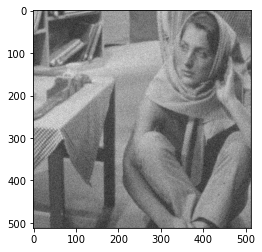

In [10]:
plt.imshow(g,cmap='gray')
plt.savefig('temp1.png',dpi=600)


In [11]:
G=np.fft.fftshift(np.fft.fft2(g))

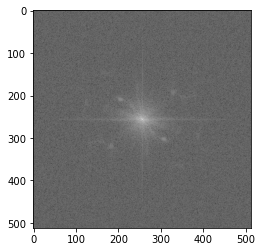

In [12]:
plt.imshow(1+np.log(np.abs(G)), cmap='gray')

In [13]:
H=np.fft.fftshift(np.fft.fft2(h,s=img.shape))

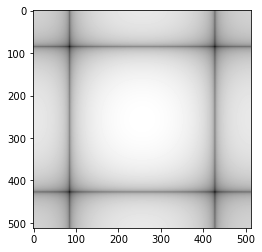

In [14]:
plt.imshow(1+np.log(np.abs(H)), cmap='gray')

In [15]:
min_thresh=100000000000
ans=0
psnr = -1
for k in np.arange(0.00095,4,0.02):
    weiner_filter = np.conj(H) / ((np.abs(H))**2 + k**2)
    F = G * weiner_filter
    f_bar = np.real(np.fft.ifft2(np.fft.ifftshift(F)))
    error = np.mean((f_bar-img)**2)
    if error < min_thresh:
        print("MinError ",error)
        min_thresh = error
        ans=f_bar
        psnr = 10 * math.log10((255**2)/error)
        print("PSNR ",psnr)
#     break
    

MinError  3110784.158967677
PSNR  -16.797895178649508
MinError  65990.99381655318
PSNR  -0.06404307966936351
MinError  25922.009409784598
PSNR  3.994116969349164
MinError  14291.836161872221
PSNR  6.579923319551027
MinError  9150.144867693494
PSNR  8.516523908733918
MinError  6397.6927484659755
PSNR  10.070569817703266
MinError  4747.2907456649755
PSNR  11.366345301667808
MinError  3679.2167292464587
PSNR  12.473249895783736
MinError  2949.2414995006584
PSNR  13.433700245296563
MinError  2430.030592561575
PSNR  14.274686197399493
MinError  2049.8632532558004
PSNR  15.013554707083923
MinError  1765.8293238265533
PSNR  15.661316363162914
MinError  1550.9814831090603
PSNR  16.22473747987614
MinError  1387.7165801498402
PSNR  16.707795836867664
MinError  1264.1573075579568
PSNR  17.112792413886446
MinError  1172.0717322541393
PSNR  17.44126169007657
MinError  1105.6237112116064
PSNR  17.694730168562952
MinError  1060.5932804471672
PSNR  17.87531489616538
MinError  1033.8738902727193
PSNR  

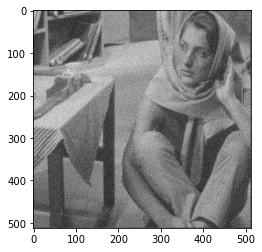

In [16]:
plt.imshow(ans,cmap='gray')
plt.savefig('temp2.png',dpi=600)

In [17]:
l=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
L=np.fft.fftshift(np.fft.fft2(l,s=img.shape))

<ipython-input-18-7d046eae9936>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(1+np.log(np.abs(L)), cmap='gray')


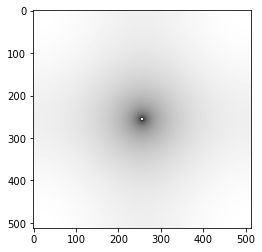

In [18]:
plt.imshow(1+np.log(np.abs(L)), cmap='gray')

In [19]:
min_thresh=100000000000
ans=0
for k in np.arange(0.00095,4,0.25):
    for gamma in np.arange(0.001,4,0.25):
        given_filter = np.conj(H) / ((np.abs(H)**2 + k**2)*(1+ gamma * np.abs(L)**2))
        F = G * given_filter
        f_bar = np.real(np.fft.ifft2(np.fft.ifftshift(F)))
        error = np.mean((f_bar-img)**2)
        if error < min_thresh:
            print("Minerror ", error)
            min_thresh = error
            ans=f_bar
            psnr = 10 * math.log10((255**2)/error)
            print("PSNR ",psnr)


Minerror  2911837.3362478158
PSNR  -16.510867494904204
Minerror  56166.69215008183
PSNR  0.6360151333622592
Minerror  17487.678169840332
PSNR  5.703482086198165
Minerror  8591.59283933912
PSNR  8.790066734968555
Minerror  5189.26823930383
PSNR  10.979742404064474
Minerror  3534.3347763936476
PSNR  12.647726768589123
Minerror  2605.98590482582
PSNR  13.971082984832563
Minerror  2033.3777033898975
PSNR  15.048623037929605
Minerror  1655.3906991446188
PSNR  15.941798500929853
Minerror  1392.823960398466
PSNR  16.69184131636197
Minerror  1203.0425662797268
PSNR  17.327993669666743
Minerror  1061.43520163737
PSNR  17.871868743115364
Minerror  952.9844038822749
PSNR  18.33994567641222
Minerror  868.103281429875
PSNR  18.745089630108694
Minerror  800.4376807573499
PSNR  19.097528359264714
Minerror  745.6405007378606
PSNR  19.405508714344556
Minerror  563.8793848130896
PSNR  20.6189414360812
Minerror  493.4471001263552
PSNR  21.198397597987103
Minerror  467.2057280399992
PSNR  21.4357220218969

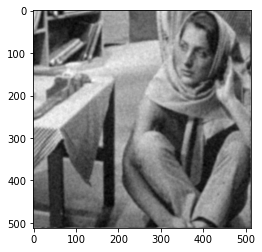

In [20]:
plt.imshow(ans,cmap='gray')
plt.savefig('temp3.png',dpi=600)


In [21]:
print(psnr)

21.805809945855938


In [22]:
error = np.mean((g-img)**2)
psnr = 10 * math.log10((255**2)/error)
print(psnr)

19.642653659260446
